In [ ]:
# https://github.com/AlpacaTechJP/selectivesearch
# https://cs.brown.edu/people/pfelzens/papers/seg-ijcv.pdf
# !pip install selectivesearch

In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import selectivesearch

## Selective search

Image size =  (480, 640, 3)


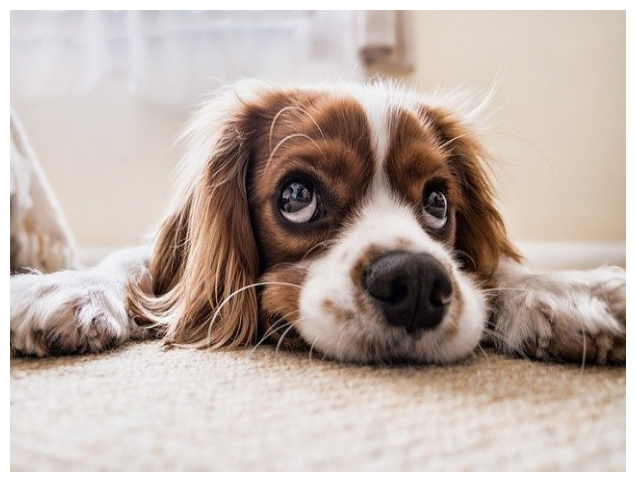

In [4]:
## Read image
img = cv2.imread("dog.bmp")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Image size = ", img.shape)
plt.figure(figsize = (12, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [5]:
## selective_search parameter
# scale : Free parameter. Higher means larger clusters in felzenszwalb segmentation.
# There is one runtime parameter for the algorithm, which is the value of k that
# is used to compute the threshold function τ . Recall we use the function τ (C) = 14
# k/|C| where |C| is the number of elements in C. Thus k effectively sets a scale of
# observation, in that a larger k causes a preference for larger components. We use
# two different parameter settings for the examples in this section (and throughout the
# paper), depending on the resolution of the image and the degree to which fine detail
# is important in the scene.

# sigma : Width of Gaussian kernel for felzenszwalb segmentation.
# In general we use a Gaussian filter to
# smooth the image slightly before computing the edge weights, in order to compensate
# for digitization artifacts. We always use a Gaussian with σ = 0.8, which does not
# produce any visible change to the image but helps remove artifacts.

# min_size : Minimum component size for felzenszwalb segmentation.

# rect : (x, y, w, h)
# proposal, regions = selectivesearch.selective_search(img_rgb, scale = 1, sigma = 0.8, min_size = 50) #
proposal, regions = selectivesearch.selective_search(img_rgb, scale = 200, sigma = 0.8, min_size = 10000) #

display(regions)
print('regions = ', len(regions))
# print(proposal)

c:\Users\user\anaconda3\envs\torchgpu_py3.9\lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


[{'rect': (0, 0, 366, 244), 'size': 49847, 'labels': [0.0]},
 {'rect': (273, 0, 366, 372), 'size': 83505, 'labels': [1.0]},
 {'rect': (0, 66, 317, 295), 'size': 42343, 'labels': [2.0]},
 {'rect': (273, 95, 230, 279), 'size': 26974, 'labels': [3.0]},
 {'rect': (192, 98, 188, 258), 'size': 26394, 'labels': [4.0]},
 {'rect': (0, 326, 639, 153), 'size': 78137, 'labels': [5.0]},
 {'rect': (192, 95, 311, 279), 'size': 53368, 'labels': [3.0, 4.0]},
 {'rect': (0, 66, 503, 308), 'size': 95711, 'labels': [3.0, 4.0, 2.0]},
 {'rect': (0, 0, 639, 374), 'size': 179216, 'labels': [3.0, 4.0, 2.0, 1.0]},
 {'rect': (0, 0, 639, 374),
  'size': 229063,
  'labels': [3.0, 4.0, 2.0, 1.0, 0.0]}]

regions =  10


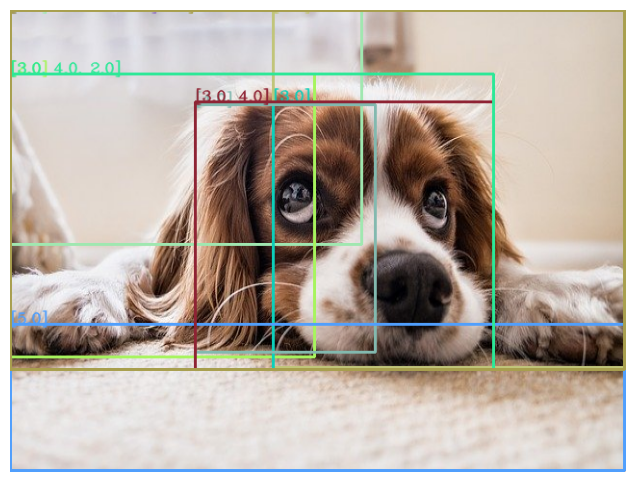

In [6]:
## Bounding box 그리기
img_rgb_copy = img_rgb.copy()
for i in regions:
    
    x = i["rect"][0]
    y = i["rect"][1]
    w = i["rect"][2]
    h = i["rect"][3]

    b = np.random.randint(0, 255)
    g = np.random.randint(0, 255)
    r = np.random.randint(0, 255)

    # color = np.random.randint(0, 255, 3)
    # cv2.rectangle(img_rgb, (x, y, w, h), (color[0], color[1], color[2]), 1)
    cv2.rectangle(img_rgb_copy, (x, y, w, h), (b, g, r), 2)
    cv2.putText(img_rgb_copy, str(i["labels"]), (x, y-1), cv2.FONT_HERSHEY_COMPLEX,
                0.5, (b, g, r), 1 , cv2.LINE_AA)

    
plt.figure(figsize = (12, 6))
plt.imshow(img_rgb_copy)
plt.axis("off")
plt.show()

## Region warp

x, y, w, h =  (273, 95, 230, 279)


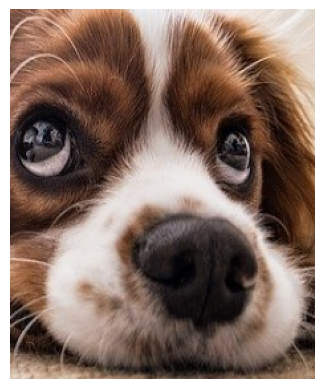

In [7]:
## Crop_region
(x, y, w, h) = regions[3]["rect"]
print("x, y, w, h = ", (x, y, w, h))

selected_region = img_rgb[y:y+h, x:x+w]
# plt.figure(figsize = (12, 6))
plt.imshow(selected_region)
plt.axis("off")
plt.show()

(227, 227, 3)


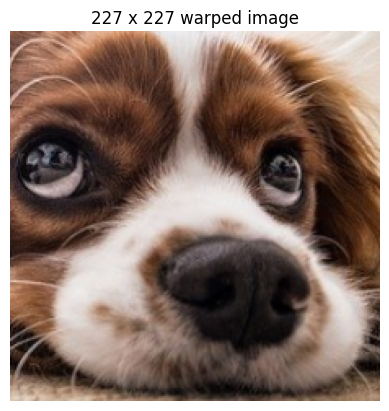

In [8]:
## Warp image
## Alexnet input dim = (227, 227, 3)
warped_region = cv2.resize(selected_region, (227, 227), interpolation=cv2.INTER_LINEAR)
# plt.figure(figsize = (227, 227))
print(warped_region.shape)
plt.imshow(warped_region)
plt.title('227 x 227 warped image')
plt.axis("off")
plt.show()